In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('airlines_delay.csv')
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


### About the dataset
- Flight = Flight Number
- Time = Departure Time in minutes
- Length = Total Flight Time
- Airline = Name of Airlines
- AirportFrom = The Departing Airport
- AirportTo = The Destination Aorport
- DayOfWeek = Day of Departure
- Class = Indicating delay/not

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [4]:
df.shape

(539382, 8)

In [5]:
#Checking missing values

df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [6]:
#Checking duplicate values

df.duplicated().sum()

216618

In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322764 entries, 0 to 539379
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       322764 non-null  float64
 1   Time         322764 non-null  float64
 2   Length       322764 non-null  float64
 3   Airline      322764 non-null  object 
 4   AirportFrom  322764 non-null  object 
 5   AirportTo    322764 non-null  object 
 6   DayOfWeek    322764 non-null  int64  
 7   Class        322764 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 22.2+ MB


In [9]:
df['Class'].value_counts()

Class
0    168162
1    154602
Name: count, dtype: int64

In [10]:
df['DayOfWeek'].value_counts()

DayOfWeek
5    51555
4    49377
3    48814
1    45844
2    45025
7    45024
6    37125
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

In [11]:
#check outlier di kolom Length

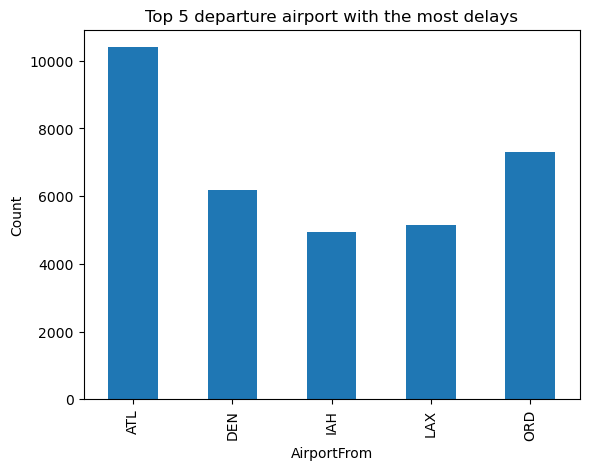

In [12]:
delayed_flights = df[df['Class'] == 1]
delayed_by_day = delayed_flights['AirportFrom'].value_counts().head(5)

delayed_by_day.sort_index().plot(kind='bar')
plt.title('Top 5 departure airport with the most delays')
plt.xlabel('AirportFrom')
plt.ylabel('Count')
plt.show()

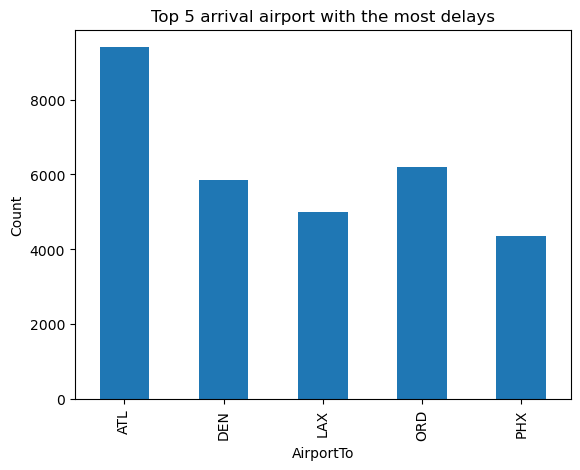

In [13]:
delayed_flights = df[df['Class'] == 1]
delayed_by_day = delayed_flights['AirportTo'].value_counts().head(5)

delayed_by_day.sort_index().plot(kind='bar')
plt.title('Top 5 arrival airport with the most delays')
plt.xlabel('AirportTo')
plt.ylabel('Count')
plt.show()

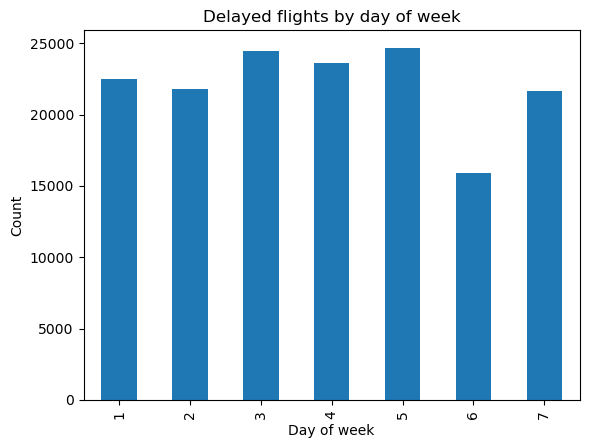

In [14]:
delayed_flights = df[df['Class'] == 1]
delayed_by_day = delayed_flights['DayOfWeek'].value_counts()

delayed_by_day.sort_index().plot(kind='bar')
plt.title('Delayed flights by day of week')
plt.xlabel('Day of week')
plt.ylabel('Count')
plt.show()

In [15]:
delayed_flights = df[df['Class'] == 1]
length_avg=delayed_flights[['Airline','Length']].groupby(['Airline'], as_index=False).mean().sort_values(by='Length',ascending=False)
length_avg

,Airline,Length
4,CO,198.984834
13,UA,195.877761
3,B6,175.740867
1,AA,174.953157
2,AS,171.916027
5,DL,157.666542
14,US,154.169837
7,F9,151.375088
8,FL,133.301294
15,WN,118.764744


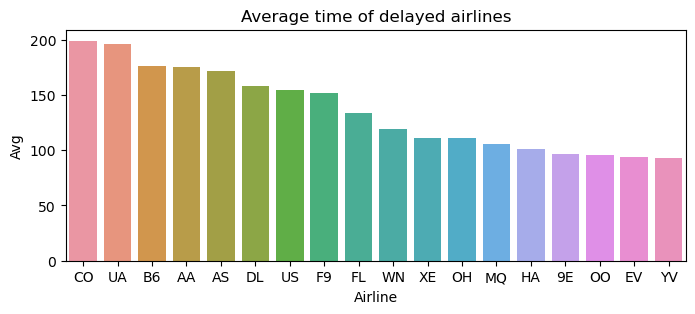

In [16]:
plt.figure(figsize=(8, 3))
sns.barplot(x=length_avg['Airline'], y=length_avg['Length'], data=length_avg)
plt.title('Average time of delayed airlines')
plt.xlabel('Airline')
plt.ylabel('Avg')
plt.show()

In [17]:
delayed_flights=df[df['Class'] == 1]
delayed_by_airline = delayed_flights['Airline'].value_counts()
delayed_by_airline

Airline
WN    38830
DL    18761
OO    16632
AA     8710
XE     8698
EV     8401
CO     7517
US     7413
MQ     7341
UA     7109
9E     6108
FL     4869
B6     4106
OH     2829
YV     2534
AS     2346
F9     1421
HA      977
Name: count, dtype: int64

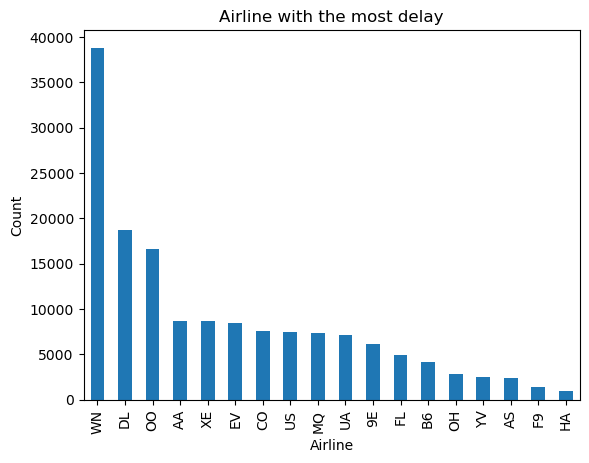

In [18]:
delayed_by_airline.plot(kind='bar')
plt.title('Airline with the most delay')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

In [19]:
#Encoding the nominal features

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Airline_encoded'] = label_encoder.fit_transform(df['Airline'])
df['AirportFrom_encoded'] = label_encoder.fit_transform(df['AirportFrom'])
df['AirportTo_encoded'] = label_encoder.fit_transform(df['AirportTo'])
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,Airline_encoded,AirportFrom_encoded,AirportTo_encoded
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0,5,16,129
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,12,65,208
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,3,35,60
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,14,203,217
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,8,32,16


In [20]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Time', 'Length', 'DayOfWeek', 'Airline_encoded', 'AirportFrom_encoded', 'AirportTo_encoded']
data_to_scale = df[columns_to_scale]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Update the original dataset with the scaled values
df[columns_to_scale] = scaled_data

In [21]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,Airline_encoded,AirportFrom_encoded,AirportTo_encoded
0,2313.0,1.763866,0.146596,DL,ATL,HOU,-1.502387,0,-0.881506,-1.591603,-0.185605
1,6948.0,-1.618736,0.219088,OO,COS,ORD,0.024471,0,0.464338,-0.979395,0.803500
2,1247.0,1.308516,0.175593,B6,BOS,CLT,-0.484481,0,-1.266033,-1.354216,-1.049507
3,31.0,2.175850,3.089778,US,OGG,PHX,1.042377,0,0.848864,0.744783,0.916182
4,563.0,-0.418924,-0.476837,FL,BMI,ATL,0.024471,0,-0.304716,-1.391698,-1.600401


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(['Flight', 'Airline', 'AirportFrom', 'AirportTo','Class'],axis=1) #feature
y = df['Class'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
X_train.shape

(225934, 6)

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_decisionTree = DecisionTreeClassifier()
model_decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
from sklearn.metrics import classification_report,accuracy_score
y_pred_decisionTree = model_decisionTree.predict(X_test)
print(classification_report(y_test,y_pred_decisionTree))
print(accuracy_score(y_test,y_pred_decisionTree))

              precision    recall  f1-score   support

           0       0.39      0.43      0.41     50583
           1       0.30      0.26      0.28     46247

    accuracy                           0.35     96830
   macro avg       0.35      0.35      0.35     96830
weighted avg       0.35      0.35      0.35     96830

0.35272126407105237


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
model_randomForest=RandomForestClassifier()
model_randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
from sklearn.metrics import classification_report,accuracy_score
y_pred_randomForest = model_randomForest.predict(X_test)
print(classification_report(y_test,y_pred_randomForest))
print(accuracy_score(y_test,y_pred_randomForest))

              precision    recall  f1-score   support

           0       0.41      0.41      0.41     50583
           1       0.35      0.34      0.35     46247

    accuracy                           0.38     96830
   macro avg       0.38      0.38      0.38     96830
weighted avg       0.38      0.38      0.38     96830

0.37752762573582566


### KNN 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors = 3)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
from sklearn.metrics import classification_report,accuracy_score
y_pred_KNN = model_KNN.predict(X_test)
print(classification_report(y_test,y_pred_KNN))
print(accuracy_score(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.45      0.46      0.46     50583
           1       0.40      0.39      0.40     46247

    accuracy                           0.43     96830
   macro avg       0.43      0.43      0.43     96830
weighted avg       0.43      0.43      0.43     96830

0.428214396364763


### Logistic Regression 

In [30]:
from sklearn.linear_model import LogisticRegression
model_logRegression = LogisticRegression()
model_logRegression.fit(X_train, y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import classification_report,accuracy_score
y_pred_logRegression = model_logRegression.predict(X_test)
print(classification_report(y_test,y_pred_logRegression))
print(accuracy_score(y_test,y_pred_logRegression))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61     50583
           1       0.54      0.42      0.47     46247

    accuracy                           0.55     96830
   macro avg       0.55      0.55      0.54     96830
weighted avg       0.55      0.55      0.54     96830

0.5512754311680265


### XGBoost 

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
from sklearn.metrics import classification_report,accuracy_score
y_pred_XGB = model_XGB.predict(X_test)
print(classification_report(y_test,y_pred_XGB))
print(accuracy_score(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64     50583
           1       0.58      0.46      0.52     46247

    accuracy                           0.59     96830
   macro avg       0.59      0.58      0.58     96830
weighted avg       0.59      0.59      0.58     96830

0.5863885159557988


In [35]:
acc_decisionTree = accuracy_score(y_test,y_pred_decisionTree)
acc_randomForest = accuracy_score(y_test,y_pred_randomForest)
acc_KKN = accuracy_score(y_test,y_pred_KNN)
acc_logRegression = accuracy_score(y_test,y_pred_logRegression)
acc_XGB = accuracy_score(y_test,y_pred_XGB)


models = pd.DataFrame(
    {
        'Model': [ 'Decision Tree', 'Random Forest','KKN','Logistic Regression','XGBoost'],
        'Score': [acc_decisionTree,acc_randomForest,acc_KKN,acc_logRegression,acc_XGB]
    }
)
models.sort_values(by='Score', ascending=False)

,Model,Score
4,XGBoost,0.586389
3,Logistic Regression,0.551275
2,KKN,0.428214
1,Random Forest,0.377528
0,Decision Tree,0.352721


## Tuning for The Best Model Obtained (XGBoost) 

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
model_best=XGBClassifier()

parameter =  {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

random_search = RandomizedSearchCV(model_best, parameter, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [37]:
best_model = random_search.best_estimator_

In [38]:
y_pred = best_model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66     50583
           1       0.61      0.43      0.50     46247

    accuracy                           0.60     96830
   macro avg       0.60      0.59      0.58     96830
weighted avg       0.60      0.60      0.59     96830

0.5972219353506145
